# HighResAnalysis

> Analysis of Data from CERN and DESY beam tests

## Prerequisites

- [python](https://www.python.org)>=3.6
    - python=3.10 was used for the development
- [cmake](https://cmake.org)>=3.7 
    - optionally [cmake GUI](https://cmake.org/runningcmake/), for example ccmake
- [git](https://git-scm.com) should already exist on most systems
- Optionally one can install [tmux](https://github.com/tmux/tmux/wiki) it useful for the conversions that take long time.

## Installation

#### Install mamba

If you do not yet have `conda` install then getting [Mambaforge](https://github.com/conda-forge/miniforge#mambaforge) is the recommended way to get `mamba`. Bellow are the instructions for Linux. If your are using a different system, then follow the instruction on [mamba install page](https://mamba.readthedocs.io/en/latest/installation.html#installation "complete mamba installation instructions")
```shell
curl -L -O "https://github.com/conda-forge/miniforge/releases/latest/download/Mambaforge-Linux-x86_64.sh"
bash Mambaforge-Linux-x86_64.sh 
```

#### Use mamba to install Root and other useful packages

[root](https://root.cern.ch). In the [root installation instructions](https://root.cern/install/#conda) you need to replace `conda` with `mamba` and skip the instructions about the environment, since the `Mambaforge` already created the default `base` environment. 
```shell
mamba config --set channel_priority strict
mamba install root
mamba install -c conda-forge root
```
- Optionally install other useful python packages:
```shell
mamba install scikit-learn numpy pandas pyarrow openpyxl xlrd pytables requests sqlalchemy jupyterlab jupyternotebook ipython notebook
mamba install -c fastai nbdev
```

#### Install the analysis code with pip

```shell
pip install HighResAnalysys
```

#### Install converters

- For the installation of the software hosted on the GitHub it is useful to make a dedicated folder:
```shell
        mkdir software
        cd software
```
- Clone all the necessary packages in this folder:
```shell
        git clone git@github.com:diamondIPP/DRS4-v5-shared.git
        git clone git@github.com:diamondIPP/pxar.git
        git clone git@github.com:diamondIPP/proteus.git
        git clone git@github.com:diamondIPP/judith.git
        git clone git@github.com:diamondIPP/HVClient.git
        git clone git@github.com:diamondIPP/eudaq-2.git
```

- Clone the analysis setup from GitHub. It contains all the necessary config files:
```shell
        git clone git@github.com:diamondIPP/setup-analysis.git HighResAnalysis
        cd HighResAnalysis/
```
- The To install the converters follow the instructions on the respective GitHub pages:
    - [proteus](https://github.com/diamondIPP/proteus)
        - It will need [Eigen3](https://eigen.tuxfamily.org/index.php?title=Main_Page) and tell the `cmake` the path to it. 
    - [judith](https://github.com/diamondIPP/judith) (only for CERN data)
    - [eudaq-2](https://github.com/diamondIPP/eudaq-2) (only for DESY data) You will need a couple of extra libraries:
        - [DRS4-v5-shared](https://github.com/diamondIPP/DRS4-v5-shared), where you only need to compile the shared library 
```shell
            make libDRS.so
```
        - [pXar](https://github.com/diamondIPP/pxar) to compile it you will need 
            - `libusb-1.0` which you can install with `apt install libusb-1.0-0-dev` on Ubuntu 
            - [FTDI chip drivers](https://ftdichip.com/drivers/d2xx-drivers/) for Linux.
```shell
            curl -L -O "https://ftdichip.com/wp-content/uploads/2022/07/libftd2xx-x86_64-1.4.27.tgz"
            tar xvf libftd2xx-x86_64-1.4.27.tgz 
            sudo cp release/build/lib* /usr/local/lib
            sudo ln -sf /usr/local/lib/libftd2xx.so.1.4.27 /usr/local/lib/libftd2xx.so
            sudo cp WinTypes.h ftd2xx.h /usr/local/include/
```
        - After compiling both `pxar` and `DRS4-v5-shared` libraries you will need to set couple of shell variable to help the `eudaq-2` find them:
```shell
            export PXARPATH="/home/dmitry/software/pxar/"
            export DRS_PATH="/home/dmitry/software/DRS4-v5-shared/"
```

## Preparation for analysis

#### Environment

- you will need an analysis folder and to tell the analysis software a path to it
    - clone the analysis directory from the Github
```shell
        git clone git@github.com:diamondIPP/setup-analysis.git HighResAnalysis
```
    - and add the following line in your `.bashrc`
```shell
        export ANALYSIS_DIR="/home/username/HighResAnalysis"
```

#### Data

- The DESY data are located on the `/home/ipp` groupshare to access them it is useful to generate shh keys and copy them to login.phys.ethz.ch
```shell
        ssh-keygen
        ssh-copy-id username@login.phys.ethz.ch
```
- The CERN data are located at CERN in rd42 eos space. It is useful to get a kerberos certificate:
```shell
        kinit -f username@CERN.CH
```

#### Data conversion

```shell
analyse --run=4
```

## Example analysis of the DESY data

you will need to import a couple of libraries. Most of the tools are in `src.dut_analysis`. It will load the data and set all the cuts. The `draw` module from plotting library has some useful functions and presets that allow plotting histograms and graphs

In [ ]:
from HighResAnalysis.src.dut_analysis import *
from HighResAnalysis.plotting.draw import *

Welcome to JupyROOT 6.28/00


Initialize the DUTAnalysis with run number, DUT number, and a string indicating the year and the month of the beam test

In [ ]:
run4 = DUTAnalysis(4, 0, '201912')

--- Palette ------ 55

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of D02, run 4 (Dec 2019), 2.50M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

************** Initing Converter *****************
*************** Initing PROTEUS ******************


A small function that allows inline plotting of ROOT histograms

In [ ]:
def dc(): get_last_canvas().Draw()

Let's plot a signal distribution

INFO:     10:34:18 --> Creating directory: /Users/hits/Documents/GitHub/HighResAnalysis/HighResAnalysis/results/201912
INFO:     10:34:18 --> saving plot: SignalDist


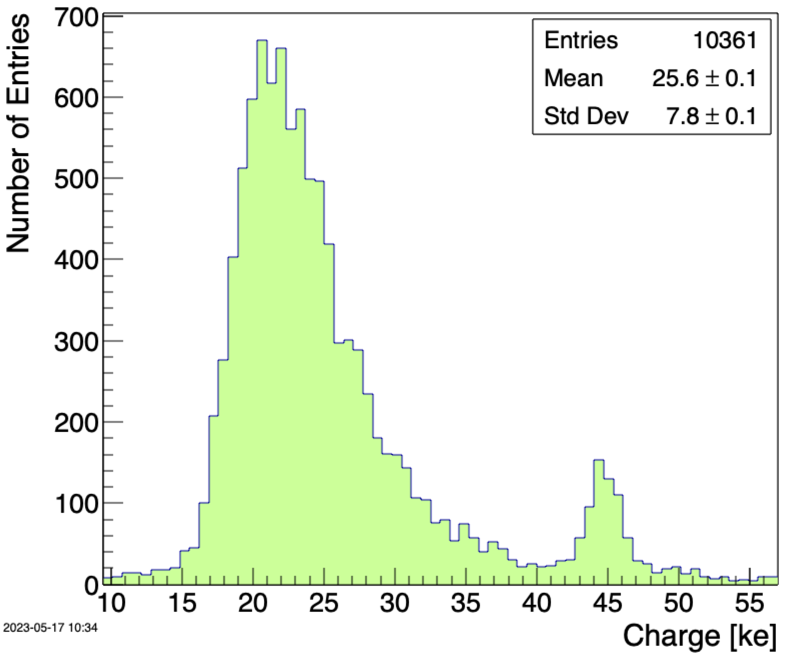

In [ ]:
run4.draw_charge_distribution()
dc()

## Run logs

There are three beam tests with high resolution data:

- [CERN 09/2018](https://docs.google.com/spreadsheets/d/1KoDi9OLU0SiqtLvTGgglQGHm51xn5J0ErAs89h6a-Rc/edit#gid=0)
- [CERN 10/2018](https://docs.google.com/spreadsheets/d/1t-MXNW0eN9tkGZSakfPdmnd_wcq4cX14Nw0bQ2ma_OQ/edit#gid=0)
- [DESY 12/2019](https://docs.google.com/spreadsheets/d/1vtwJnPLbk0M1UztpSX9SZNsPYAyMCO0TnYQzD6jQWoo/edit#gid=0)

### Conversion to json files

- requires `client_secret.json` file which is stored on `ipp group share` in `~/HighResAnalysis/`
- convert online runlogs to a `runlog.json` file with [HighResAnalysis/src/spreadsheet.py](spreadsheet.py):

```shell
    make_runlog <YYYYMM>
```

- runlogs are stored in the data directory which may be set in the config
